In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
xpts = np.linspace(0,np.pi*2,100)
ypts = np.sin(xpts)

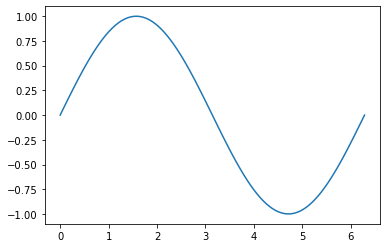

In [3]:
plt.plot(xpts,ypts)

/home/suryajb/miniconda3/envs/research/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


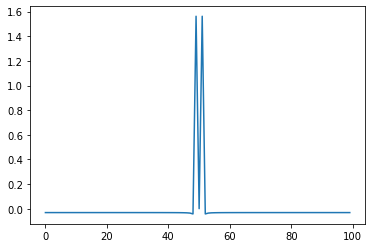

In [4]:
plt.plot(np.fft.fftshift(np.fft.fft(ypts)))

In [4]:
import pyfftw
import numpy as np
from matplotlib import pyplot as plt

In [18]:
xpts = np.linspace(0,np.pi*2,100)
ypts2 = np.sin(2*xpts)

In [15]:
%timeit np.fft.fft(ypts2)

2.86 µs ± 18.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
t = pyfftw.builders.fft(ypts,threads=1)

In [33]:
it = pyfftw.builders.ifft(ypts,threads=1)

In [10]:
%timeit t = pyfftw.builders.fft(ypts)

40.9 µs ± 525 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
%timeit t(ypts2)

1.14 µs ± 7.53 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


/home/suryajb/miniconda3/envs/research/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


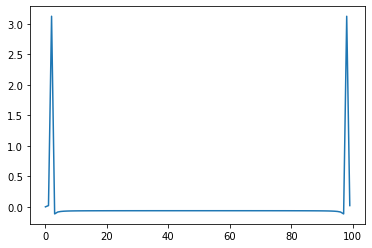

In [20]:
plt.plot(t(ypts2))

In [8]:
%timeit t()

221 ns ± 1.67 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
a = pyfftw.empty_aligned(128, dtype='complex128', n=16)
a[:] = np.random.randn(128) + 1j*np.random.randn(128)

In [19]:
%timeit b = pyfftw.interfaces.numpy_fft.fft(a)

46.4 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
d = np.random.randn(128) + 1j*np.random.randn(128)

In [17]:
%timeit c = np.fft.fft(d)

2.99 µs ± 14.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
K = 2**10
Llx = 10.
KT = 2*K
dx = Llx/np.float64(K)
X = np.arange(-Llx,Llx,dx)
a = pyfftw.empty_aligned(KT, dtype='complex128', n=16)
b = pyfftw.empty_aligned(KT, dtype='complex128', n=16)
fft_object = pyfftw.FFTW(a,b,threads=1)
# fft_object = pyfftw.builders.fft(a,threads=1)
a[:] = 2.*np.cosh(X)**(-2)


In [12]:
%timeit np.fft.fft(a)
%timeit fft_object(a)

17.1 µs ± 40.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.22 µs ± 7.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [82]:
%timeit fft_object(a)

14.1 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
pyfftw.import_wisdom((b'(fftw-3.3.8 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n  (fftw_codelet_t1fv_8_sse2 1 #x11bdd #x11bdd #x0 #x5dbf26bc #xcd33ec90 #x3a9fdaa2 #x8a0d6c4f)\n  (fftw_codelet_t1fv_2_avx 0 #x11bdd #x11bdd #x0 #x52d2c729 #xd90ebce1 #x6bd78c14 #x22b31d6d)\n  (fftw_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x9b255152 #xe1a51097 #x9535dda9 #x99ef97e7)\n  (fftw_codelet_n1fv_64_avx 0 #x11bdd #x11bdd #x0 #x79f56a9a #x7c7286b2 #x5888aa2a #x2ff01451)\n  (fftw_codelet_n1fv_32_avx 0 #x11bdd #x11bdd #x0 #x825953e1 #x17abf19a #x87efd392 #x6f33c5ea)\n  (fftw_codelet_t2fv_8_avx 0 #x11bdd #x11bdd #x0 #x59f8d213 #x3b4b6803 #x8893236a #xac51b6aa)\n  (fftw_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x0a6f547e #x0295c551 #x3504d95c #xbe04b21e)\n  (fftw_codelet_t2fv_16_avx 0 #x11bdd #x11bdd #x0 #x1cae2522 #xaa604bda #xbe9614ae #x5eb78f71)\n  (fftw_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x22b08baa #x22f9e700 #x90212358 #x4c1c8aef)\n)\n',
 b'(fftw-3.3.8 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n)\n',
 b'(fftw-3.3.8 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n'))

(True, True, True)